In [1]:
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
import numpy as np

# Tensores
Podemos definir los tensores como una progresión matemática de las cantidades escalares y vectoriales. En esta sección vamos a dar definiciones prácticas para ser implementadas numéricamente.
1. Escalares: Representadas por un número único, son independientes del sistema de coordenadas.
2. Vectores: Representados por una tupla de valores dependientes del sistema de coordenada.
3. Tensores de 2do orden: Pueden ser representados por medio de matrices, los cuales, en general, son independientes del sistema de coordenadas.
Un tensor puede relacionar dos vectores:
$$u = Tv$$
Usando la notación de índices:
$$u_i = T_{ij}v_j$$

In [2]:
T = np.ones((3,3))
for i in range(len(T)):
    for j in range(len(T)):
        if i!=j:
            T[i,j] = i+1
        else:
            T[i,j] = j+2
print(T)

[[2. 1. 1.]
 [2. 3. 2.]
 [3. 3. 4.]]


In [3]:
#Creamos dos vectores
u = np.zeros(3)
v = np.array([1,2,2])

In [4]:
#Transformamos el vector v en u
for i in range(3):
    u[i] = 0
    for j in range(3):
        u[i] = u[i] + T[i,j]*v[j]
    
print(u)

[ 6. 12. 17.]


Los tensores pueden ser construidos a partir del producto de Kronecker de dos vectores 
$$T = u \otimes v$$
Usando la notación de índices,
$$T_{ij} = u_i v_j$$

In [6]:
S = np.ones((2,2))
sz1 = np.array([1,0])
sz2 = np.array([0,1])

In [13]:
for i in range(len(S)):
    for j in range(len(S)):
        S[i,j] = sz1[i] * sz2[j] #Producto de Kronecker

print(S)

[[0. 1.]
 [0. 0.]]


In [18]:
T = np.ones((3,3))
for i in range(len(T)):
    for j in range(len(T)):
        T[i,j] = u[i]*v[j]
print(T)

[[ 6. 12. 12.]
 [12. 24. 24.]
 [17. 34. 34.]]


Si b representa una matriz de cambio de coordenadas, las nuevas componentes del tensor se obtienen a través del tensor original. Esto es lo que realmente define a los tensores: Sus propiedades de transformación.
$$T' = bTb^T$$
En notación de subíndices,
$$T'_{ij} = b_{ik}b_{jl}T_{kl} $$
También podemos encontrar el tensor original usando el tensor nuevo:
$$T = b^T T' b$$
1. Definamos una matriz que representa una rotación alrededor del eje.

In [19]:
theta = np.pi/4.0

b = np.array( [[np.cos(theta), -np.sin(theta), 0], [ np.sin(theta), np.cos(theta), 0], [0.,0.,1.]]) 
print(b)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [20]:
# Encontrar las componentes usando indices

Tprime = np.zeros((3,3))

for i in range(len(T)):
    for j in range(len(T)):
        for k in range(len(T)):
            for l in range(len(T)):
                Tprime[i,j] = Tprime[i,j] + b[i,k]*b[j,l]*T[k,l]

print(Tprime)

[[  3.          -9.          -8.48528137]
 [ -9.          27.          25.45584412]
 [-12.02081528  36.06244584  34.        ]]


In [22]:
# Encontrar usando las formas matriciales
Tprime2 = b @ T @ b.T
print(Tprime2)

[[  3.          -9.          -8.48528137]
 [ -9.          27.          25.45584412]
 [-12.02081528  36.06244584  34.        ]]


#### También podemos transformar primero los vectores y posteriormente hacer el producto de Kronecker

In [24]:
uprime = np.zeros(3)
vprime = np.zeros(3)

for i in range(len(uprime)):
    for j in range(len(uprime)):
        uprime[i] += b[i,j]*u[j]
        vprime[i] += b[i,j]*v[j]
print(uprime)
print(vprime)

[-4.24264069 12.72792206 17.        ]
[-0.70710678  2.12132034  2.        ]


In [25]:
Tprime3 = np.ones((3,3))

for i in range(len(uprime)):
    for j in range(len(uprime)):
        Tprime3[i,j] = uprime[i]*vprime[j]
        
print(Tprime3)

[[  3.          -9.          -8.48528137]
 [ -9.          27.          25.45584412]
 [-12.02081528  36.06244584  34.        ]]


# Ejes principales de un tensor
Los tensores pueden ser simétricos (T_{ij}, T{ji}). Siempre es posible encontrar un sistema de coordenadas donde el tensor tome una forma diagonal. Podemos encontrar los ejes principales encontrando los valores y vectores propios.

In [26]:
T = np.ones((3,3))
T[0,0] = -4.0
T[1,1] = 3.0
T[2,2] = 2.0
T[0,1] = 3.0; T[1,0] = T[0,1]
T[0,2] = -1.0; T[2,0] = T[0,2]
T[1,2] = -3.0; T[2,1] = T[1,2]
print(T)

[[-4.  3. -1.]
 [ 3.  3. -3.]
 [-1. -3.  2.]]


In [27]:
valores, vectores = np.linalg.eig(T)
print(valores)
print(vectores)

[ 6.38719536 -5.11153053 -0.27566482]
[[-0.27656948 -0.93570162  0.21902465]
 [-0.76272731  0.35237891  0.54228789]
 [ 0.58459932  0.0170758   0.81114244]]


$T = ADA^T$

In [28]:
D = np.zeros((3,3))

for i in range(len(D)):
    for j in range(len(D)):
        if i==j:
            D[i,j] = valores[i]
print(D)

[[ 6.38719536  0.          0.        ]
 [ 0.         -5.11153053  0.        ]
 [ 0.          0.         -0.27566482]]


In [31]:
Tprime = vectores @ D @ vectores.T
print(Tprime)

[[-4.  3. -1.]
 [ 3.  3. -3.]
 [-1. -3.  2.]]


# El tensor de inercia: Crear datos

In [39]:
def CreateData(Npoints, R):
    
    X = []
    Y = []
    Z = []
    
    for i in range(Npoints):
        
        phi = np.random.uniform(0., 2*np.pi) 
        costheta = np.random.uniform(-1.,1.)
        theta = np.arccos(costheta)
        u = np.random.rand()
      
        a = 1.0
        b = 1.5
        c = 3.0
      
        ra = a * u**(1./3.)
        rb = b * u**(1./3.)
        rc = c * u**(1./3.)
        
        X = np.append(X, ra*np.cos(phi)*np.sin(theta))
        Y = np.append(Y, rb*np.sin(phi)*np.sin(theta))
        Z = np.append(Z, rc*np.cos(theta))
    
    return X, Y, Z

In [40]:
data_sphere = CreateData(5000, 1)
data_sphere = np.array(data_sphere)

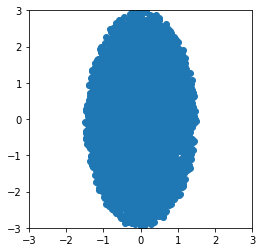

In [48]:
fig = plt.figure(figsize=(4,4))
plt.xlim(-3.,3.)
plt.ylim(-3.,3.)
plt.scatter(data_sphere[1], data_sphere[2])
plt.show()

In [60]:
# Vamos a crear una matriz de rotacion
# hacemos rotación alrededor de
theta = np.pi/2

rota = np.array([[1.,0.,0.],[0., np.cos(theta), -np.sin(theta)], [ 0., np.sin(theta), np.cos(theta)]]) 
print(rota)

[[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17]]


In [61]:
new_data = rota.T @ data_sphere #Transformar datos

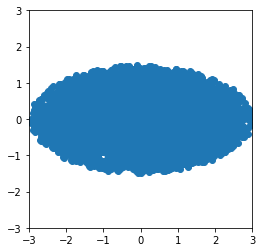

In [62]:
fig = plt.figure(figsize=(4,4))
plt.xlim(-3.,3.)
plt.ylim(-3.,3.)
plt.scatter(new_data[1], new_data[2])
plt.show()

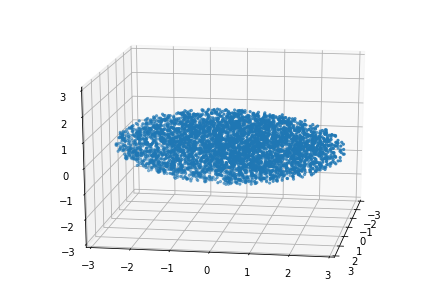

In [63]:
fig = plt.figure()
ax = Axes3D(fig, elev=18, azim=9)
X,Y,Z = new_data[0], new_data[1], new_data[2]
ax.scatter(X, Y, Z, marker='.')
ax.set_xlim(-3.,3.)
ax.set_ylim(-3.,3.)
ax.set_zlim(-3.,3.)
plt.show()